In [1]:
%pylab inline
%matplotlib inline
from scipy.special import gamma as Gamma, gammaln

Populating the interactive namespace from numpy and matplotlib


In [2]:
#################################################
# UTILS TO GENERATE AND EMBED THE MOVIE
#################################################

from tempfile import NamedTemporaryFile
import shutil
import base64

WEBM_VIDEO_TAG = """<video controls>
 <source src="data:video/x-webm;base64,{0}" type="video/webm">
 Your browser does not support the video tag.
</video>"""

M4V_VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

FPS = 20         # Frames per second in the generated movie

def anim_to_html(anim, filename=None):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.webm') as f:
            webm_writer = animation.FFMpegWriter(fps=FPS, codec="libvpx")  # you'll need libvpx to encode .webm videos
            vpx_args = ["-quality", "good",    # many arguments are not needed in this example, but I left them for reference
                        "-cpu-used", "0",
                        "-b:v", "500k",
                        "-qmin", "10",
                        "-qmax", "42",
                        "-maxrate", "500k",
                        "-bufsize", "1000k",
                        "-threads", "4",
                        "-vf", "scale=-1:240",
                        "-codec:a", "libvorbis",
                        "-b:a", "128k"]
            anim.save(f.name, writer=webm_writer, extra_args=vpx_args)
            if filename is not None:  # in case you want to keep a copy of the generated movie
                shutil.copyfile(f.name, filename)
            video = open(f.name, "rb").read()
        anim._encoded_video = base64.b64encode(video).decode('ascii')
        
    return WEBM_VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim, filename=None):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim, filename))

from matplotlib import animation
animation.Animation._repr_html_ = anim_to_html

In [3]:
def gen_coherent(n, alpha):
    ns = r_[:n]
    return exp(-abs(alpha)**2 / 2 + log(alpha) * ns - gammaln(ns + 1) / 2)

def calc_Q(state, alpha):
    coherent_state = gen_coherent(len(state), alpha)
    return abs(coherent_state.dot(state))**2

def calc_Qs(state, r_range, i_range):
    r_len = len(r_range)
    i_len = len(i_range)
    res = zeros((r_len, i_len))
    for r_i in range(r_len):
        for i_i in range(i_len):
            res[r_i, i_i] = calc_Q(state, r_range[r_i] + 1j * i_range[i_i])
    return res

In [4]:
def gen_state1(theta, phi):
    res = zeros(13, dtype=complex128)
    res[0] = cos(theta / 2)
    res[12] = exp(1j * phi) * sin(theta / 2)
    return res

/usr/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


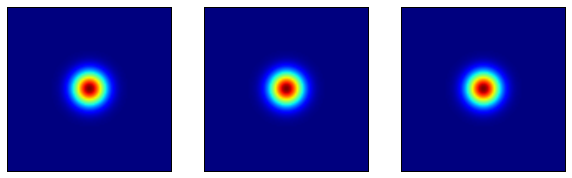

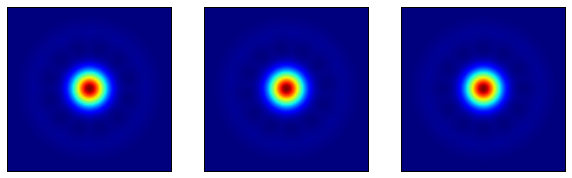

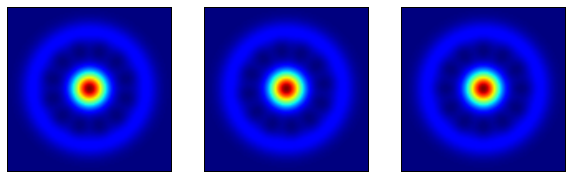

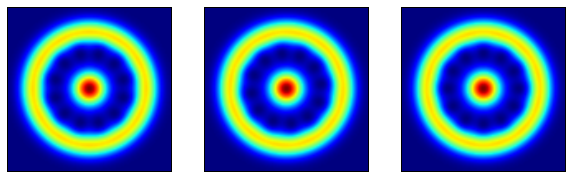

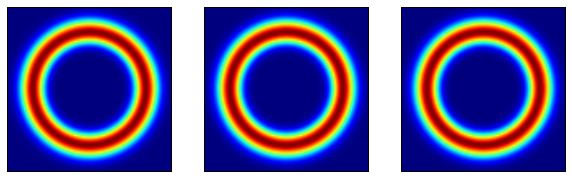

In [5]:
for i in range(5):
    fig, axs = subplots(1, 3, figsize=(10, 30))
    for j in range(3):
        ax = axs[j]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(calc_Qs(gen_state1(pi * i / 4, pi * j / 2),
                          r_[-5:5:100j], r_[-5:5:100j]))
    fig.savefig('3-1-%d_4.png' % i, bbox_inches='tight')
    fig.show()

In [14]:
def gen_state2(n, alpha):
    return (gen_coherent(n, alpha) + gen_coherent(n, -alpha)) / sqrt(2)

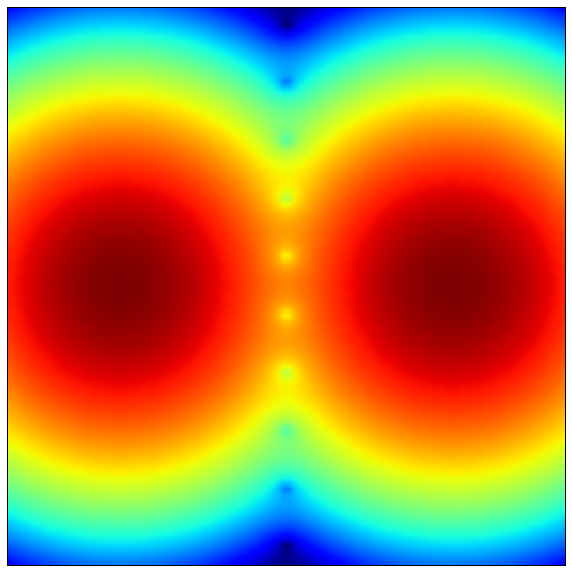

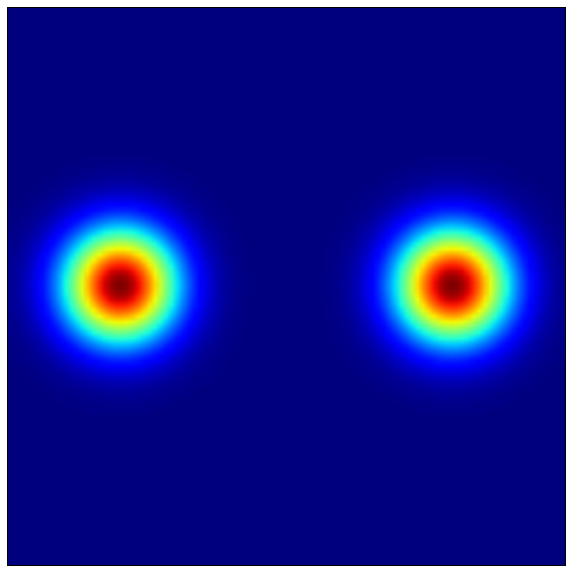

In [52]:
Qs = calc_Qs(gen_state2(50, 3j), r_[-5:5:100j], r_[-5:5:100j])

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(log(Qs))
fig.savefig('3-2-log.png', bbox_inches='tight')
fig.show()

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(Qs)
fig.savefig('3-2-lin.png', bbox_inches='tight')
fig.show()

In [6]:
def gen_state3(N, phi):
    ns = r_[:N]
    return exp(1j * ns * phi) / sqrt(N)

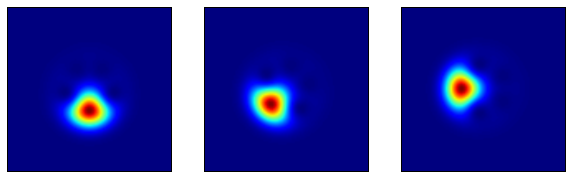

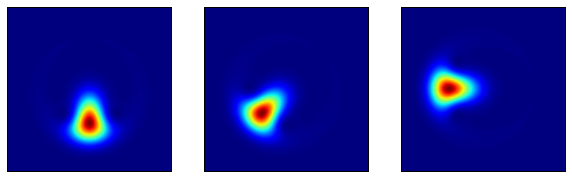

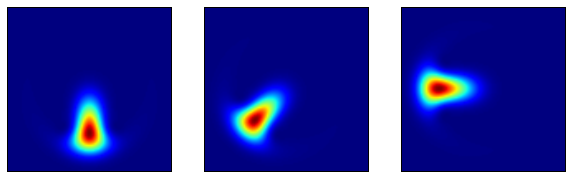

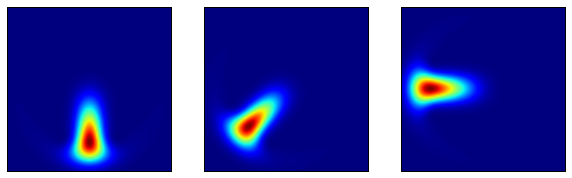

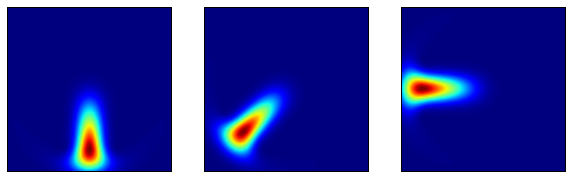

In [8]:
for i in range(5):
    fig, axs = subplots(1, 3, figsize=(10, 30))
    N = (i + 1) * 5
    for j in range(3):
        ax = axs[j]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(calc_Qs(gen_state3(N, pi * j / 4),
                          r_[-5:5:100j], r_[-5:5:100j]))
    fig.savefig('3-3-%d.png' % N, bbox_inches='tight')
    fig.show()

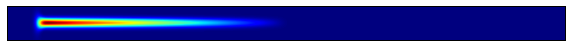

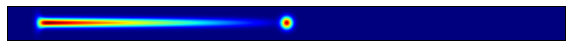

In [7]:
fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
N = 2000
Qs_big = calc_Qs(gen_state3(N, pi / 2), r_[-3:3:0.1], r_[-50:50:0.1])
ax.imshow(Qs_big)
fig.savefig('3-3-%d.png' % N, bbox_inches='tight')
fig.show()

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
Qs_0 = calc_Qs(gen_state3(1, pi / 2), r_[-3:3:0.1], r_[-50:50:0.1])
ax.imshow(Qs_big + Qs_0 / 10)
fig.savefig('3-3-%d_0.png' % N, bbox_inches='tight')
fig.show()

In [64]:
def gen_squeezed(n, e):
    ns = r_[:n]
    te = tanh(e)
    res = zeros(n * 2)
    log_vals = gammaln(2 * ns + 1) / 2 - gammaln(ns + 1) + log(te / 2) * ns
    res[::2] = 1 / sqrt(cosh(e)) * exp(log_vals)
    return res

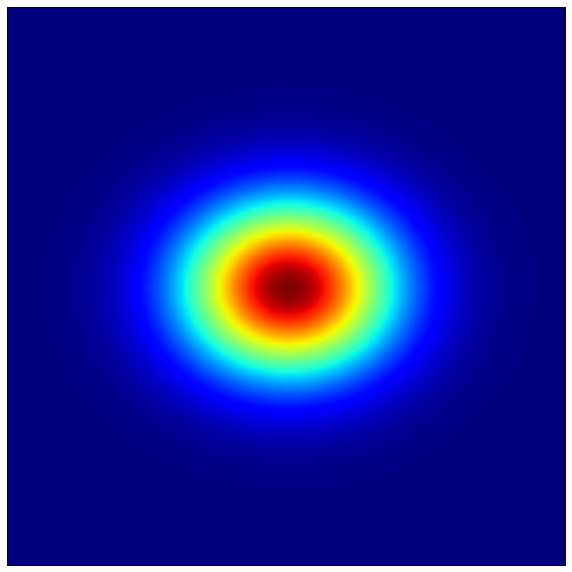

In [120]:
state = gen_squeezed(300, 0.2)
Qs = calc_Qs(state, r_[-3:3:0.05], r_[-3:3:0.05])

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(Qs.T)
fig.savefig('3-4-02.png', bbox_inches='tight')
fig.show()

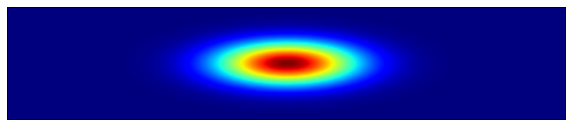

In [118]:
state = gen_squeezed(300, 1.2)
Qs = calc_Qs(state, r_[-10:10:0.05], r_[-2:2:0.05])

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(Qs.T)
fig.savefig('3-4-12.png', bbox_inches='tight')
fig.show()

In [119]:
state = gen_squeezed(1000, 4)
Qs = calc_Qs(state, r_[-50:50:0.05], r_[-1.5:1.5:0.05])

fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(Qs.T)
fig.savefig('3-4-4.png', bbox_inches='tight')
fig.show()

In [121]:
def gen_state5(n, alpha, t):
    ns = r_[:n]
    return gen_coherent(n, alpha) * exp(1j * t * ns * (ns - 1))

In [162]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = figure(figsize=(10, 10))
ax = gca()
ax.set_xticks([])
ax.set_yticks([])
init_data = abs(calc_Qs(gen_state5(50, 4, 0), r_[-5:5:50j], r_[-5:5:50j]))
init_data /= init_data.max()
im = imshow(init_data)

# initialization function: plot the background of each frame
def init():
    im.set_data(init_data)
    return im,

# animation function.  This is called sequentially
def animate(i):
    data = abs(calc_Qs(gen_state5(50, 4, i * 0.01), r_[-5:5:100j], r_[-5:5:100j]))
    im.set_data(data / data.max())
    return im,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
display_animation(anim, filename='3-5.webm')

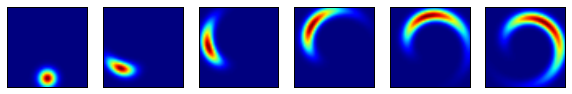

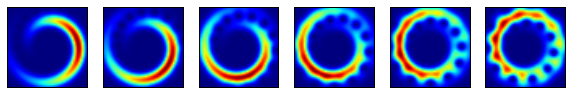

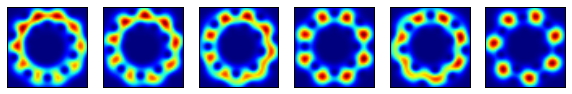

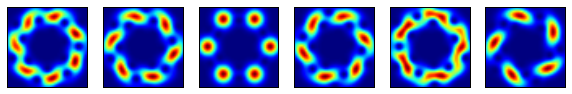

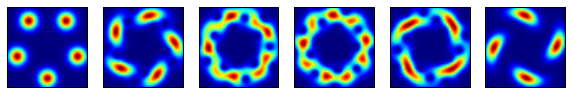

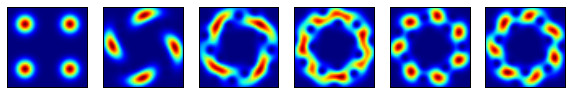

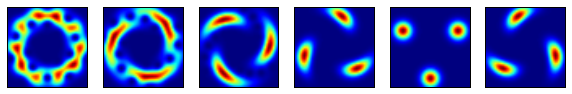

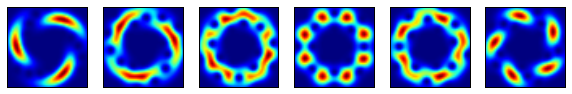

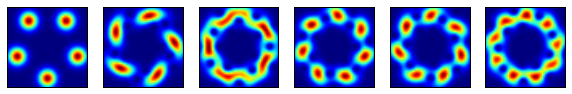

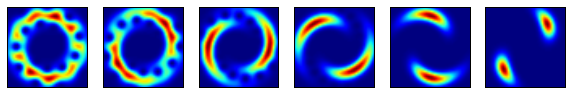

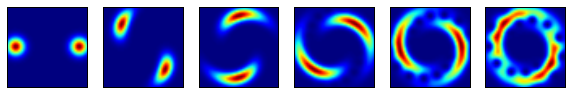

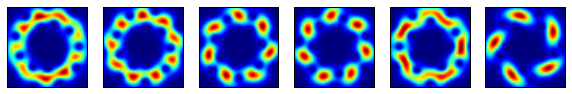

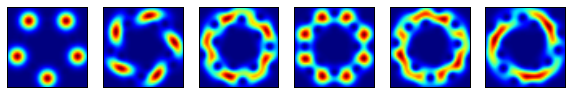

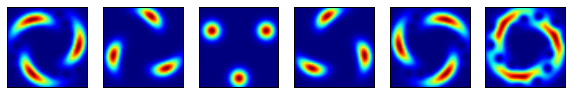

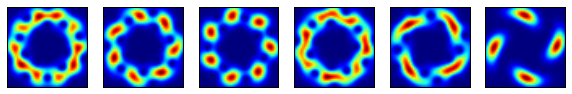

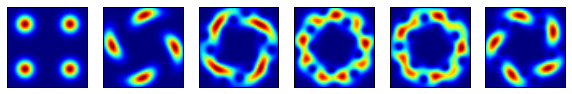

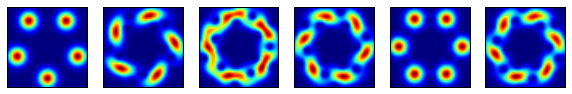

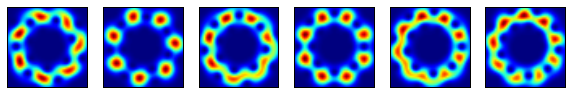

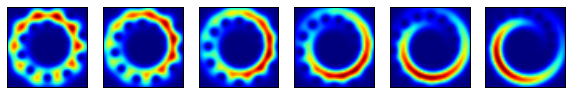

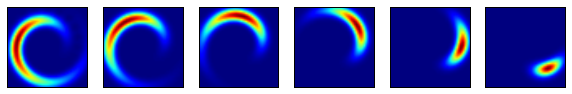

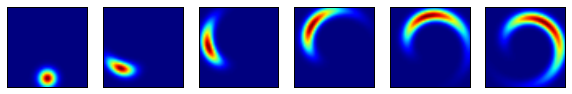

In [158]:
for i in range(21):
    fig, axs = subplots(1, 6, figsize=(10, 60))
    for j in range(6):
        idx = i * 6 + j
        ax = axs[j]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(calc_Qs(gen_state5(50, 4, idx * pi / 120),
                          r_[-5:5:50j], r_[-5:5:50j]))
    fig.savefig('3-5-%d.png' % i, bbox_inches='tight')
    fig.show()